<a href="https://colab.research.google.com/github/Tahimi/convectionDiffusion/blob/main/advection1D_FiniteDiference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
# space discretization
xL = 0.
xR = 1.
dx = 0.01
delX = xR - xL
nx = int(delX/dx)
x = np.linspace(xL, xR, nx+1)

In [3]:
# time discretization
Cr = 0.5 # Courant Number: Cr = u*dt/dx
u = 1.
dt = Cr*dx/u
delT = 0.7
stepsNbr = int(delT/dt)

In [4]:
# defining the unkown's distribution
def distributionIn1D(x, yMin, yMax, xc, width, isRectangular = True):
  if isRectangular:
    # rectangular distribuition
    return np.array([yMax if xc-width < xi and xi < xc+width else yMin for xi in x])
  else:
    # Gaussian distribuition
    return yMin + yMax * np.exp(-(x - xc) ** 2 / (2 * width ** 2))

In [5]:
# unkown's initialization
yMin = 0.
yMax = 1.
xc = 0.25
width = 0.05

def initialize():
    # unkown's initialization
    global x, yMin, yMax, xc, width, yInit, y
    yInit = distributionIn1D(x=x,
                             yMin=yMin,
                             yMax=yMax,
                             xc=xc,
                             width=width,
                             isRectangular=False)
    y = np.copy(yInit)

In [6]:
# oneStepExplicitFirstOrderUpwindAdvection
# forwardFirstOrderAccurateInTime
# upwindFirstOrderAccurateInSpace
# obs. only u > 0 is implemented, i.e. upwind = backward
def advect1(yIN, Cr, yUpstream=yMin):
  yOUT = np.zeros_like(yIN)
  # internal points
  for i in range(1,len(x)-1):
    yOUT[i] = Cr*yIN[i-1] + (1.-Cr)*yIN[i]
  # Dirichlet BC upstream
  yOUT[0] = yUpstream
  # Absorbing BC downstream
  yOUT[-1] = Cr*yIN[-2] + (1.-Cr)*yIN[-1]
  return yOUT

In [7]:
# displaying some parameters
print('Cr = ', Cr, '\n'
      'dx = ', dx, '\n'
      'u = ', u, '\n'
      'dt = ', dt, '\n'
      'delT = ', delT, '\n'
      'stepsNbr = ', stepsNbr)

Cr =  0.5 
dx =  0.01 
u =  1.0 
dt =  0.005 
delT =  0.7 
stepsNbr =  140


In [8]:
# initialize and iterate in time
initialize()
for step in range(stepsNbr):
  y = advect1(y, Cr)

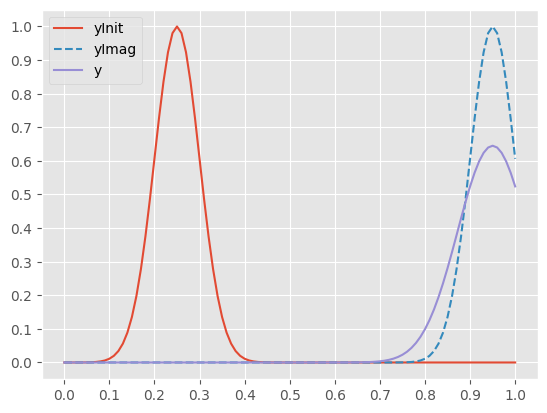

In [9]:
#ploting the simulation results
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.xticks(np.arange(xL, xR+.1, .1))
plt.yticks(np.arange(yMin, yMax+.1, .1))
plt.plot(x, yInit, label='yInit')
yImag = distributionIn1D(x=x,
                         yMin=0.,
                         yMax=1.,
                         xc=.25+u*delT,
                         width=0.05,
                         isRectangular = False)
plt.plot(x, yImag, '--', label='yImag')
plt.plot(x, y, label='y')
plt.legend()
plt.show()